I have the clean data from the previous step that includes 3 dataframes: <br>
- Order: sales data organized by order
- Items: sales data organized by line item
- Cust: sales data organized and aggregated by customer id

I will first focus on the customer sales data, as that one is higher level. Here are the columns in that dataframe:
- Cust_ID: unique indentifier for each customer <br>
- Life_Total: total dollars spent by that customer over their lifetime <br>
- Avg_Order: total dollars spent by that customer per order <br>
- Orders: number of orders by that customer <br>
- Sub_Total: sum in dollars spent by the customer not including shipping and tax <br>
- Ship_Total: total dollars spent on shipping over the life of the customer <br>
- Refund_Total: total dollars refunded to the customer <br>
- Marketing: yes or no if the customer accepts marketing (may convert to booleen) <br>
- Total_Items: total number of items ordered by the customer over their lifetime <br>
- Avg_Items: average number of items per order
- first_order: datetime of first order <br>
- last_order: datetime of last order <br>
- server: mail server used by the customer <br>
- Disc_Total: total in dollars that the customer over their lifetime <br>
- Vendor: 0 = first order from Company, 1 = first order from outside source <br>
- Emp: True = employee of the company, False = regular customer <br>
- Source: what type of device was used to place the order <br>
- ship_bill: does the shipping and billing zip code match <br>
- Area_Code: area code of the shipping phone number <br>
- Ship_Zip: zip code of the shipping address

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import ppscore as pps

In [2]:
import pickle
os.chdir("C:\Springboard\Github\Capstone2_cust\Intermediate_Data")

In [3]:
# load the pickled version of the Customer DF (Cust)
df = pickle.load(open("Cust1.pkl", "rb"))
# look at the first 10 rows of this file
df.head(10)

,Cust_ID,Life_Total,Avg_Order,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing,Total_Items,Avg_Items,first_order,last_order,server,Disc_Total,Vendor,Emp,Source,ship_bill,Area_Code,Ship_Zip
0,75306.0,0.00,0.00,1,0.00,0.0,0.0,no,4,4.0,2020-03-18 04:04:53+00:00,2020-03-18 04:04:53+00:00,custom,154.00,0.0,True,iphone,False,NaN,32817
1,112053.0,145.58,145.58,1,145.58,0.0,0.0,yes,2,2.0,2019-11-26 21:44:16+00:00,2019-11-26 21:44:16+00:00,custom,16.17,1.0,False,web,True,404,30087
2,112055.0,137.55,137.55,1,137.55,0.0,0.0,no,5,5.0,2019-11-26 20:52:08+00:00,2019-11-26 20:52:08+00:00,custom,0.00,1.0,False,web,True,845,12545
3,112095.0,22.98,22.98,1,22.98,0.0,0.0,yes,2,2.0,2019-11-26 18:12:04+00:00,2019-11-26 18:12:04+00:00,custom,0.00,1.0,False,web,True,262,53402
4,130108.0,28.00,28.00,1,28.00,0.0,0.0,no,1,1.0,2019-08-07 18:14:49+00:00,2019-08-07 18:14:49+00:00,custom,0.00,0.0,False,web,True,617,01983
5,130110.0,12.00,12.00,1,12.00,0.0,0.0,yes,1,1.0,2019-08-07 18:05:28+00:00,2019-08-07 18:05:28+00:00,custom,0.00,0.0,False,web,True,740,43143
6,130188.0,42.00,42.00,1,42.00,0.0,0.0,no,2,2.0,2019-08-07 03:45:52+00:00,2019-08-07 03:45:52+00:00,custom,0.00,0.0,False,web,True,701,58801
7,130231.0,27.20,27.20,1,27.20,0.0,0.0,yes,1,1.0,2019-08-06 22:00:54+00:00,2019-08-06 22:00:54+00:00,custom,6.80,0.0,False,web,True,754,33026
8,130241.0,22.00,22.00,1,22.00,0.0,22.0,yes,2,2.0,2019-08-06 20:22:25+00:00,2019-08-06 20:22:25+00:00,custom,0.00,0.0,False,web,True,NaN,01880
9,130245.0,100.00,100.00,1,100.00,0.0,100.0,yes,5,5.0,2019-08-06 19:59:05+00:00,2019-08-06 19:59:05+00:00,custom,0.00,0.0,False,web,True,617,01880


In [4]:
# let's add a column if they are a repeat customer (ordered more than once)
df['repeat'] = df['Orders'] > 1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39771 entries, 0 to 39770
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Cust_ID       39771 non-null  float64            
 1   Life_Total    39771 non-null  float64            
 2   Avg_Order     39771 non-null  float64            
 3   Orders        39771 non-null  int64              
 4   Sub_Total     39771 non-null  float64            
 5   Ship_Total    39771 non-null  float64            
 6   Refund_Total  39771 non-null  float64            
 7   Marketing     39771 non-null  object             
 8   Total_Items   39771 non-null  int64              
 9   Avg_Items     39771 non-null  float64            
 10  first_order   39771 non-null  datetime64[ns, UTC]
 11  last_order    39771 non-null  datetime64[ns, UTC]
 12  server        39771 non-null  object             
 13  Disc_Total    39771 non-null  float64            
 14  Vendor

In [6]:
df.describe()

,Cust_ID,Life_Total,Avg_Order,Orders,Sub_Total,Ship_Total,Refund_Total,Total_Items,Avg_Items,Disc_Total,Vendor
count,3.977100e+04,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000
mean,2.130449e+12,102.437610,62.273366,1.546856,99.469555,1.678049,2.155301,3.599733,2.177243,2.319155,0.551709
std,5.576757e+11,142.792375,44.557245,1.582350,138.446262,5.369948,17.297491,4.872447,1.107580,21.090725,0.497325
min,7.530600e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.928451e+12,32.980000,32.980000,1.000000,32.980000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,2.073490e+12,61.960000,54.970000,1.000000,57.960000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000
75%,2.569577e+12,107.160000,73.536667,1.000000,103.560000,0.000000,0.000000,4.000000,2.428571,0.000000,1.000000
max,2.779653e+12,4813.390000,683.300000,48.000000,4516.200000,297.190000,642.550000,142.000000,40.000000,1723.380000,1.000000


These are very interesting. The outliers are extremely different. Let's visualize it.

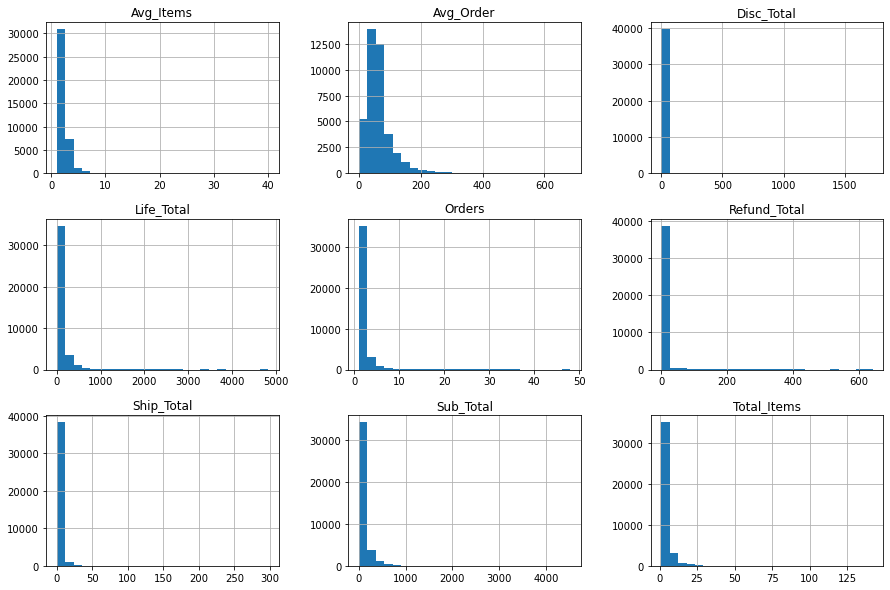

In [7]:
hist = df[['Life_Total', 'Avg_Order', 'Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Total_Items', 'Avg_Items', 'Disc_Total']].hist(bins=25, figsize=(15,10))

In [8]:
df['repeat'].value_counts()

False    30072
True      9699
Name: repeat, dtype: int64

Just as the stats indicated, there is a massive difference, where a few customers make up the vast majority of orders and money spent.

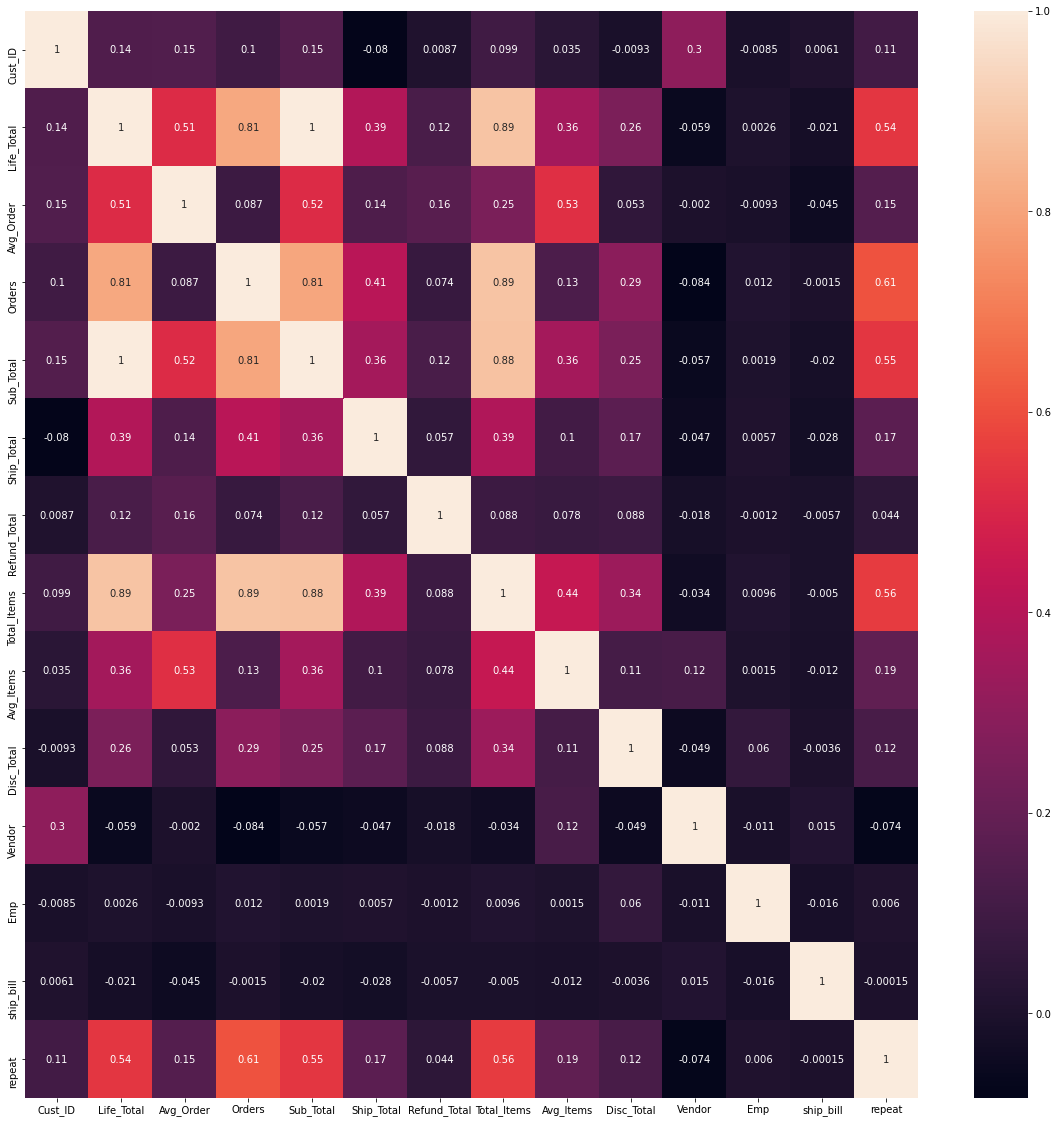

In [9]:
# let's look at the correlation coefficient 
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(corr, annot=True, ax=ax)

These all look very much as expected

In [10]:
# look to see if we can save this groupby values into a DF. Then do the calculations in that DF and plot
temp = df.groupby([df["first_order"].dt.year, df["first_order"].dt.month]).sum()

In [11]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 95 entries, (2012, 10) to (2020, 9)
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       95 non-null     float64
 1   Life_Total    95 non-null     float64
 2   Avg_Order     95 non-null     float64
 3   Orders        95 non-null     int64  
 4   Sub_Total     95 non-null     float64
 5   Ship_Total    95 non-null     float64
 6   Refund_Total  95 non-null     float64
 7   Total_Items   95 non-null     int64  
 8   Avg_Items     95 non-null     float64
 9   Disc_Total    95 non-null     float64
 10  Vendor        95 non-null     float64
 11  Emp           95 non-null     float64
 12  ship_bill     95 non-null     float64
 13  repeat        95 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 10.9 KB


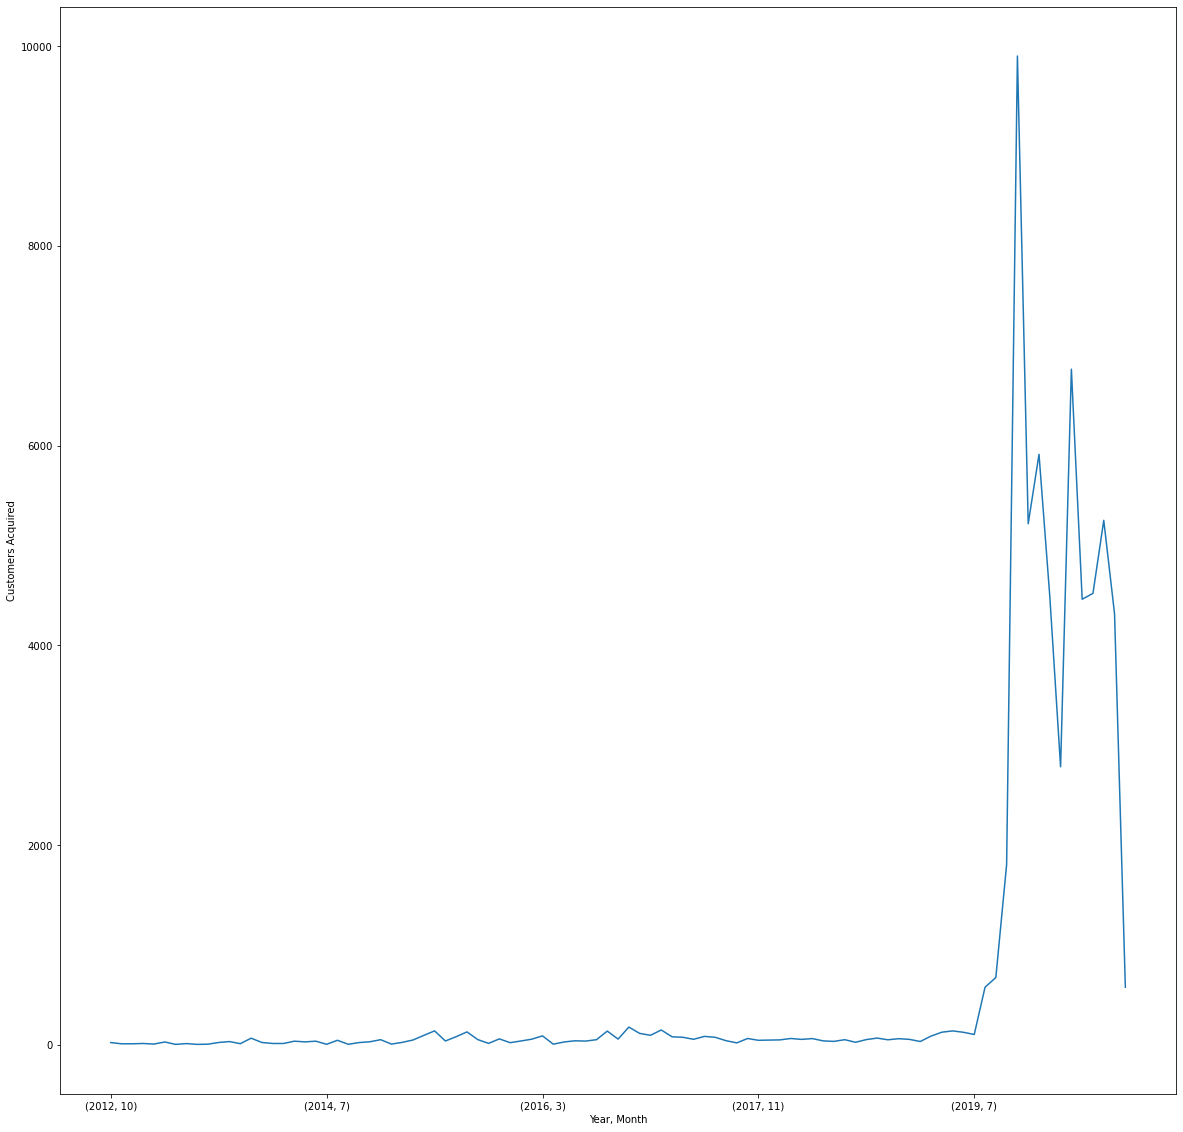

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['Orders'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Customers Acquired')

Looks like an explosion of orders starting in August 2019. We will come back to this to see if this affected Churn or Customer Retention. Let's start by looking at if they were a repeat customer based on the date.

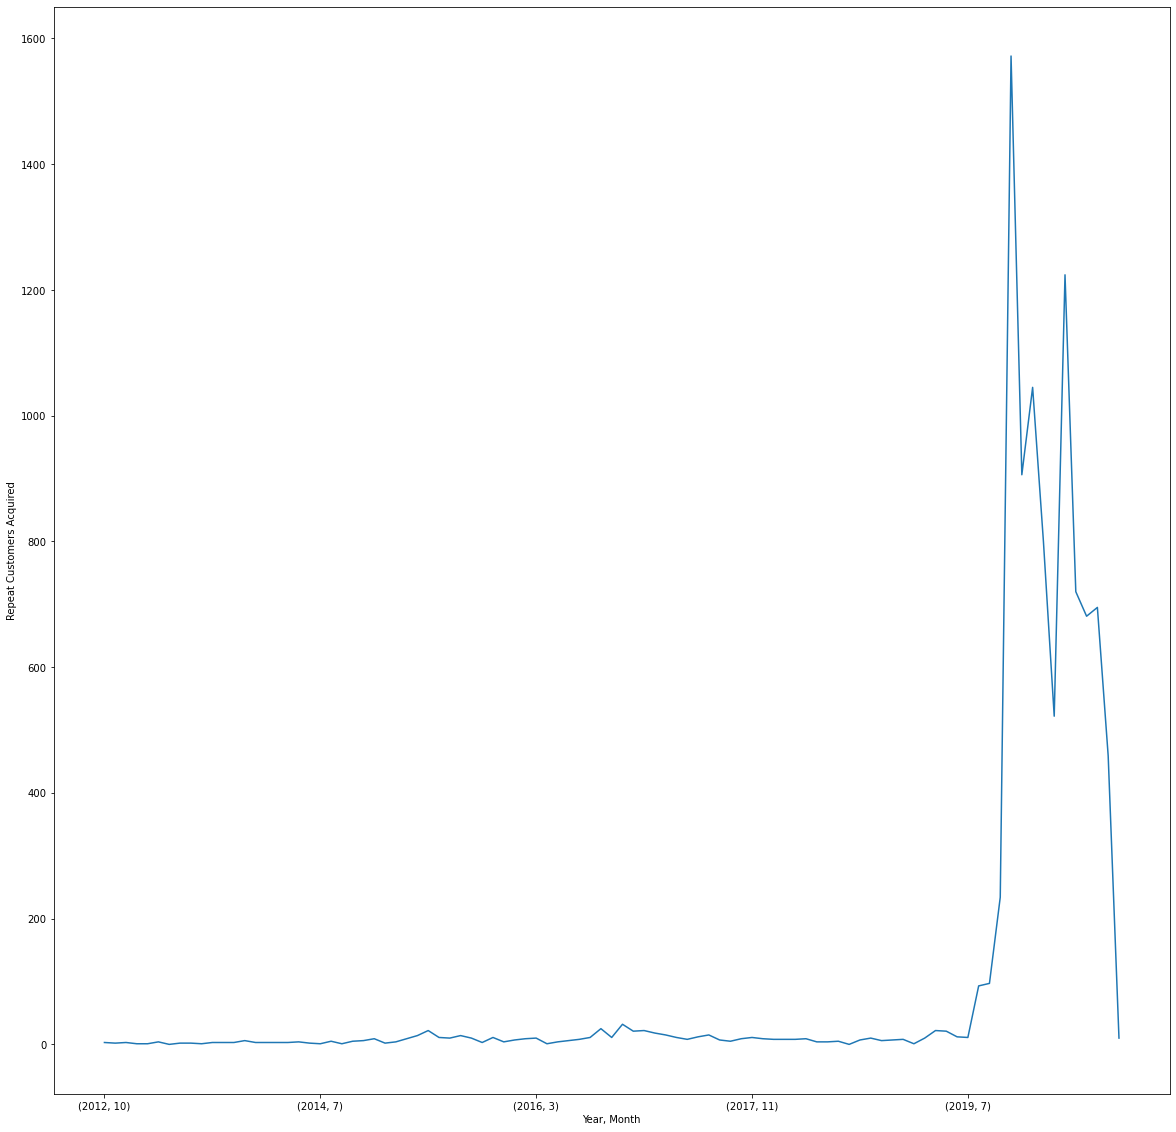

In [13]:
# number of repeat customers that were acquired during a time
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['repeat'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Repeat Customers Acquired')

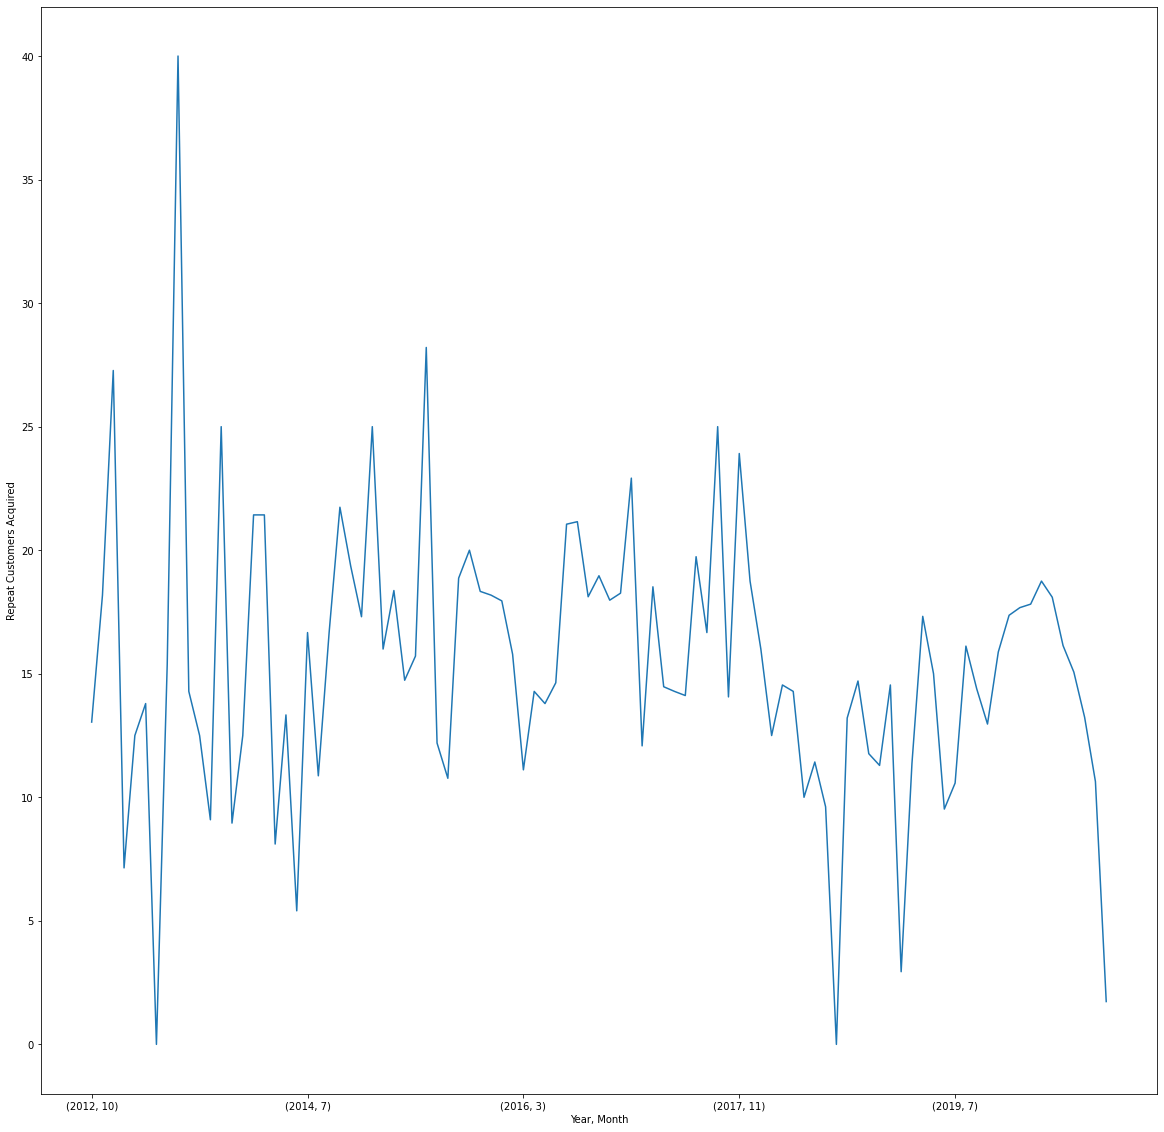

In [14]:
# let's see the percentage of repeat customers acquired over time
temp['repeat_prc'] = (temp['repeat']/temp['Orders'])*100
# number of repeat customers that were acquired during a time
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['repeat_prc'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Fraction of Repeat Customers Acquired')

This looks almost random over time with a slight downward trend starting at the end of 2017.

## let's take a look at the order data so that we can calculate churn rate

In [15]:
# load the pickled version of the Customer DF (Cust)
Orders = pickle.load(open("Order1.pkl", "rb"))
# look at the first 10 rows of this file
Orders.head(10)

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Employee,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared
Name,,,,,,,,,,,,,,,,,,,,,
#10000,paid,fulfilled,yes,8.0,0.00,8.62,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:49:51+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.029549e+12,1,NaN
#10001,paid,fulfilled,yes,44.0,0.00,44.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:22:12+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.604838e+12,2,NaN
#10002,paid,fulfilled,yes,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:57:00+00:00,1,...,False,NaN,web,0.0,yahoo.com,False,813,1.928534e+12,1,-1.0
#10003,paid,fulfilled,yes,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:15:01+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825239e+12,1,-1.0
#10004,paid,fulfilled,yes,8.0,0.00,8.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:26:41+00:00,1,...,False,NaN,web,0.0,gmail.com,True,513,1.886785e+12,1,NaN
#10005,paid,fulfilled,yes,34.0,14.55,48.55,0.0,USPS First Class International,2019-10-25 17:26:46+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825258e+12,1,-1.0
#10006,partially_refunded,fulfilled,yes,56.0,8.99,64.99,0.0,Priority Mail,2019-10-25 18:24:25+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825330e+12,2,NaN
#10007,paid,fulfilled,yes,80.0,0.00,80.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:38:36+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825345e+12,5,NaN
#10008,paid,fulfilled,yes,72.0,0.00,72.00,8.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:59:44+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.010503e+12,4,NaN


In [16]:
Orders.shape

(61520, 29)

In [17]:
Orders.groupby(Orders["Created at"].dt.year).sum()

,Subtotal,Shipping,Total,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,Lineitem requires shipping,Refunded Amount,Vendor,Outstanding Balance,Employee,Lineitem discount,ship_bill,Cust_ID,ITEMS,compared
Created at,,,,,,,,,,,,,,,,,
2012,7.180000e+02,109.18,8.374200e+02,56.00,25,372.00,0.00,22.0,0.00,0.0,0.00,0.0,0.0,19.0,6.062206e+11,63,0.000000
2013,4.522300e+03,750.92,5.415640e+03,297.50,184,2599.00,0.00,142.0,89.72,0.0,0.00,0.0,0.0,126.0,5.895669e+13,308,0.000000
2014,8.258700e+03,772.29,9.405470e+03,359.38,411,3204.90,173.72,189.0,0.00,0.0,30.00,0.0,0.0,171.0,1.079906e+14,737,13.089277
2015,2.029540e+04,2041.38,2.313385e+04,1581.00,764,9884.30,364.70,514.0,189.29,0.0,150.00,0.0,0.0,442.0,1.895902e+14,1589,48.285714
2016,3.710759e+04,1778.51,4.065904e+04,1282.31,756,17923.01,1287.25,686.0,113.92,0.0,-13.81,0.0,0.0,634.0,4.160625e+14,1641,75.714029
2017,6.963005e+04,1359.40,7.387878e+04,5490.04,1254,40790.80,1929.00,1164.0,868.18,0.0,-200.00,0.0,0.0,1052.0,1.240192e+15,2385,inf
2018,8.750564e+04,5769.28,9.507321e+04,9477.43,1539,42847.82,-5316.00,1409.0,269.11,29.0,-4.64,0.0,0.0,1313.0,2.089229e+15,3396,-99.000000
2019,8.058769e+05,18019.04,8.326500e+05,24563.98,14837,281569.12,-53279.27,9022.0,26823.96,5414.0,38.48,1.0,0.0,13349.0,2.788267e+16,33078,inf
2020,2.922089e+06,36137.68,2.992993e+06,49127.49,43446,795134.63,168887.22,19033.0,57364.29,23826.0,923.71,7.0,0.0,39385.0,1.026025e+17,99968,947.392728


let's see the customer repeat rate from 2018 to 2019

In [18]:
# all purchases in 2018
pur18 = Orders[Orders["Created at"].dt.year == 2018]
# number of customers that purchased in 2018
cust18 = pur18.groupby('Cust_ID').count()
# counts up the rows of those unique customer that purchased in 2018
tot18 = cust18.shape[0]
pur18.shape

(1443, 29)

In [25]:
# all purchases in 2018 and 2019
pur1819 = Orders[Orders["Created at"].dt.year.isin([2018,2019])]
# number of customers that purchased in both 2018 and 2019
# pur1819.groupby('Cust_ID').count()

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Outstanding Balance,Employee,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,ITEMS,compared
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1.120530e+05,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
1.120550e+05,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1.120950e+05,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
1.301080e+05,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
1.301100e+05,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.777044e+12,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,0,3,0
2.777044e+12,6,6,6,6,6,6,6,6,6,6,...,6,6,0,6,6,6,6,2,6,4
2.777047e+12,1,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,1,1,1,1,0


In [26]:
# all purchases in 2019
pur19 = Orders[Orders["Created at"].dt.year == 2019]
pur19.shape

(14463, 29)

In [28]:
# merge to find all of the customer repeat orders in both 2018 and 2019 dataframes
repeat = pd.merge(pur18, pur19, how='inner', on='Cust_ID')
repeat.shape

(3573, 57)

In [34]:
# find all of the unique customers that purchased in both 2018 and 2019
cust1819 = repeat.groupby('Cust_ID').sum()
# extract that number of customers that repeated
repeat1819 = cust1819.shape[0]
# calculating the repeat rate from 2018 to 2019 - as a percentage
repeat_rate1819 = (repeat1819/tot18)*100
# print out repeat rate between 2018 and 2019
repeat_rate1819

32.795698924731184

In [35]:
# calculate churn rate for that 2018 - 2019 period
churn_1819 = 100 - repeat_rate1819
# churn as a percentage printed out
churn_1819

67.20430107526882

In [41]:
# see if I can do this for all of the years - generalize
pur = {}
rep = {}
# creates dictionary of dataframes with orders from each year
for yr in range(2012,2021):
    # calculates the purchase in a specific year
    pur[yr] = Orders[Orders["Created at"].dt.year == yr]
    
# merges those dataframes to calculate the repeat rate
for yr in range(2012,2020):
    repeat = pd.merge(pur[yr], pur[yr+1], how='inner', on='Cust_ID')
    cust_r = repeat.groupby('Cust_ID').sum()
    rep[yr] = (cust_r.shape[0]/pur[yr].shape[0])*100
rep

{2012: 18.181818181818183,
 2013: 12.676056338028168,
 2014: 16.93121693121693,
 2015: 15.310077519379844,
 2016: 21.44927536231884,
 2017: 18.461538461538463,
 2018: 16.90921690921691,
 2019: 15.14900089884533}

In [37]:
pur

{2012:       Financial Status Fulfillment Status Accepts Marketing  Subtotal  \
 Name                                                                    
 #1001             paid          fulfilled               yes      18.0   
 #1004             paid          fulfilled                no      18.0   
 #1005             paid          fulfilled               yes      25.6   
 #1006             paid          fulfilled                no      18.0   
 #1007             paid          fulfilled                no       8.0   
 #1008             paid          fulfilled               yes      18.0   
 #1009             paid          fulfilled               yes      28.0   
 #1010             paid          fulfilled               yes      50.0   
 #1011             paid          fulfilled                no      10.0   
 #1012             paid          fulfilled                no      44.8   
 #1013             paid          fulfilled               yes     129.6   
 #1014             paid         